In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import folium
import numpy as np
from geopy.geocoders import Nominatim
from tqdm import tqdm
import plotly.express as px

In [3]:
df = pd.read_csv('Data/cleaned_df.csv')

In [3]:
df.head()

,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,Job Description,skills,Responsibilities,Company,Company Profile,min_experience,max_experience,average_experience,min_salary,max_salary,average_salary
0,M.Tech,Douglas,Isle of Man,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15,10.0,59000,99000,79000.0
1,BCA,Ashgabat,Turkmenistan,Intern,100340,2022-12-19,Female,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12,7.0,56000,116000,86000.0
2,PhD,Macao,"Macao SAR, China",Temporary,84525,2022-09-14,Male,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12,6.0,61000,104000,82500.0
3,PhD,Porto-Novo,Benin,Full-Time,129896,2023-02-25,Female,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11,7.5,65000,91000,78000.0
4,MBA,Santiago,Chile,Intern,53944,2022-10-11,Female,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12,6.5,64000,87000,75500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610462 entries, 0 to 1610461
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Qualifications      1610462 non-null  object 
 1   location            1610462 non-null  object 
 2   Country             1610462 non-null  object 
 3   Work Type           1610462 non-null  object 
 4   Company Size        1610462 non-null  int64  
 5   Job Posting Date    1610462 non-null  object 
 6   Preference          1610462 non-null  object 
 7   Job Title           1610462 non-null  object 
 8   Role                1610462 non-null  object 
 9   Job Description     1610462 non-null  object 
 10  skills              1610462 non-null  object 
 11  Responsibilities    1610462 non-null  object 
 12  Company             1610462 non-null  object 
 13  Company Profile     1610462 non-null  object 
 14  min_experience      1610462 non-null  int64  
 15  max_experience 

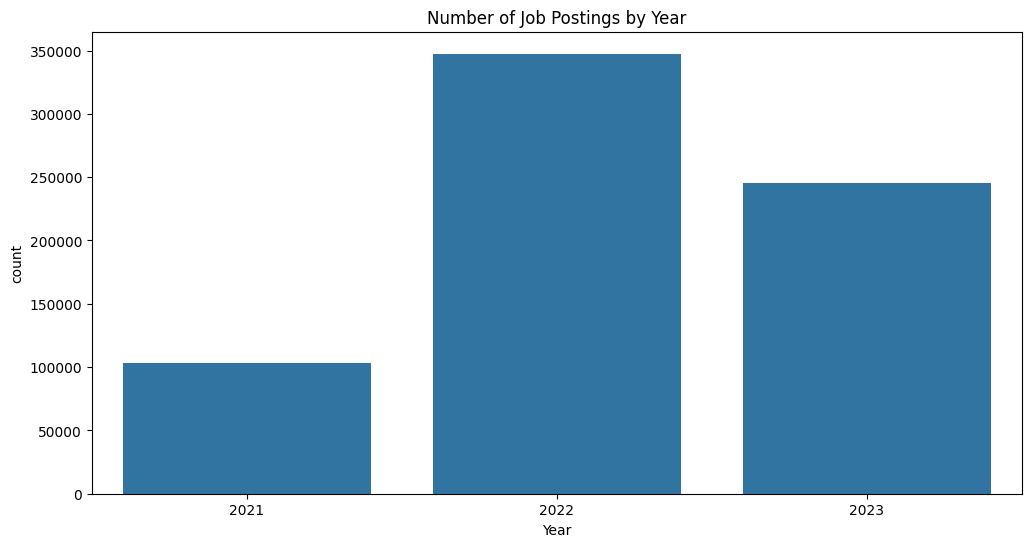

In [5]:
data['Job Posting Date'] = pd.to_datetime(data['Job Posting Date'])
data['Year'] = data['Job Posting Date'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data)
plt.title('Number of Job Postings by Year')
plt.show()


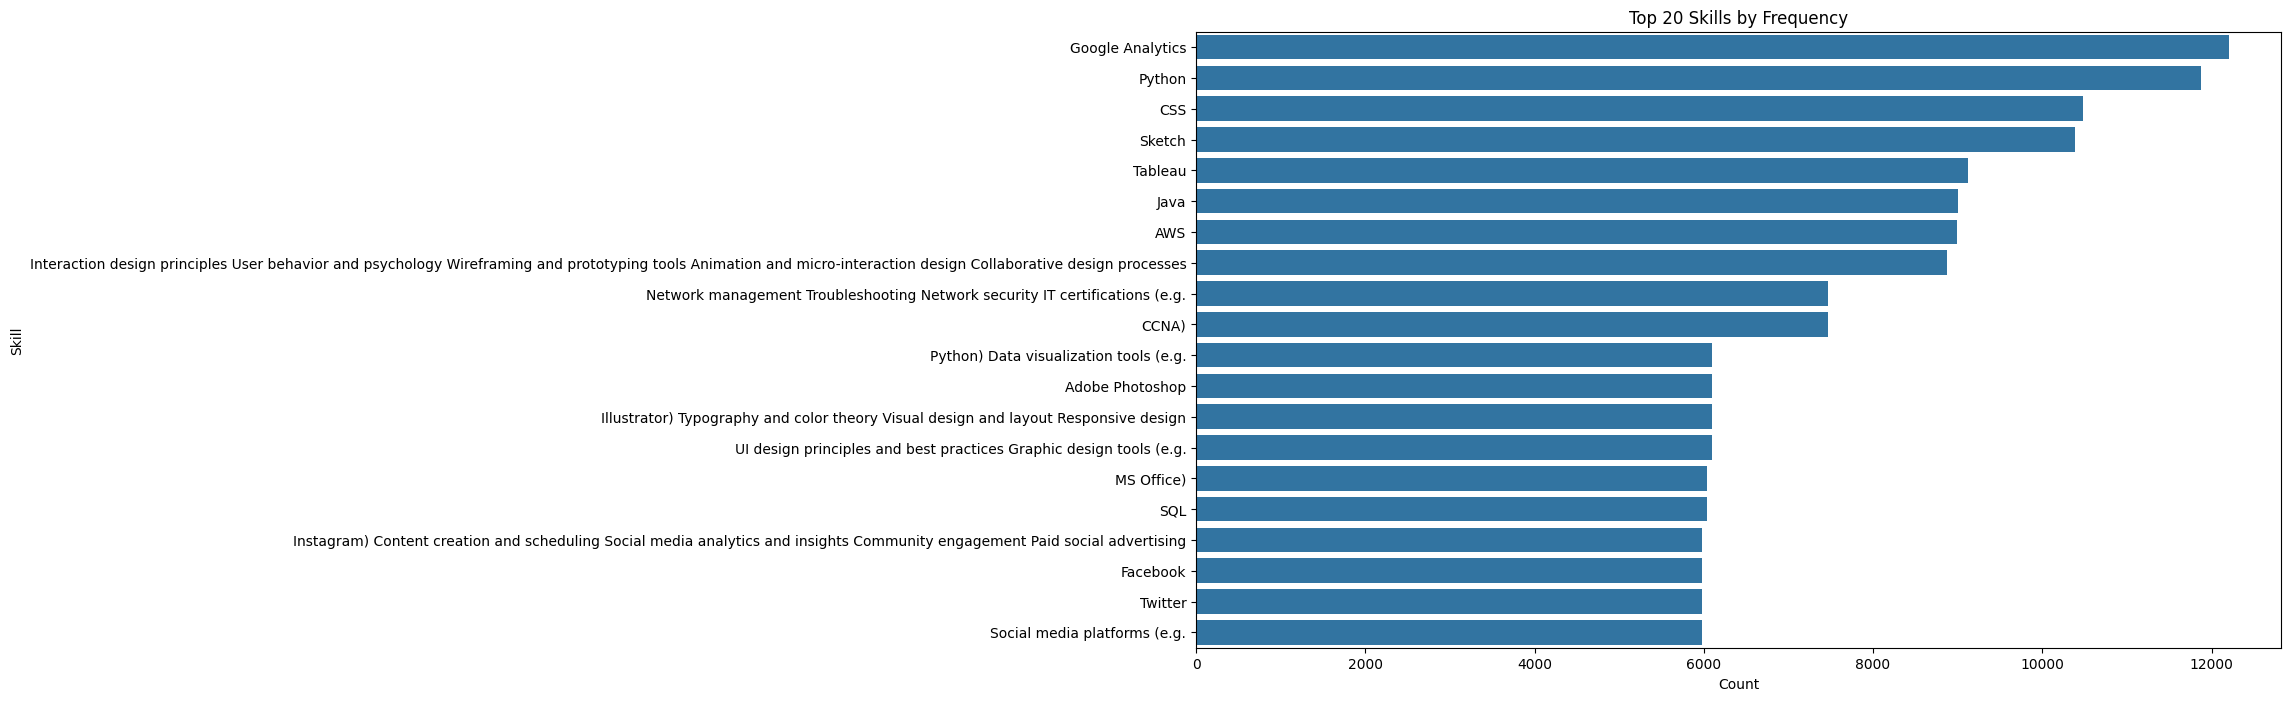

In [9]:
from collections import Counter

# Assuming skills are separated by commas
all_skills = ','.join(data['skills'].dropna()).split(',')
skills_count = Counter([skill.strip() for skill in all_skills])
skills_df = pd.DataFrame(skills_count.items(), columns=['Skill', 'Count'])
skills_df = skills_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Skill', data=skills_df.head(20))  # Top 20 skills
plt.title('Top 20 Skills by Frequency')
plt.show()


In [5]:
df[['min_experience', 'max_experience', 'average_experience', 'min_salary', 'max_salary', 'average_salary']].describe()

,min_experience,max_experience,average_experience,min_salary,max_salary,average_salary
count,1.610462e+06,1.610462e+06,1.610462e+06,1.610462e+06,1.610462e+06,1.610462e+06
mean,2.501967e+00,1.149798e+01,6.999974e+00,6.000329e+04,1.049783e+05,8.249079e+04
std,1.707813e+00,2.291943e+00,1.428444e+00,3.163946e+03,1.471730e+04,7.528376e+03
min,0.000000e+00,8.000000e+00,4.000000e+00,5.500000e+04,8.000000e+04,6.750000e+04
25%,1.000000e+00,9.000000e+00,6.000000e+00,5.700000e+04,9.200000e+04,7.600000e+04
50%,3.000000e+00,1.100000e+01,7.000000e+00,6.000000e+04,1.050000e+05,8.250000e+04
75%,4.000000e+00,1.300000e+01,8.000000e+00,6.300000e+04,1.180000e+05,8.900000e+04
max,5.000000e+00,1.500000e+01,1.000000e+01,6.500000e+04,1.300000e+05,9.750000e+04


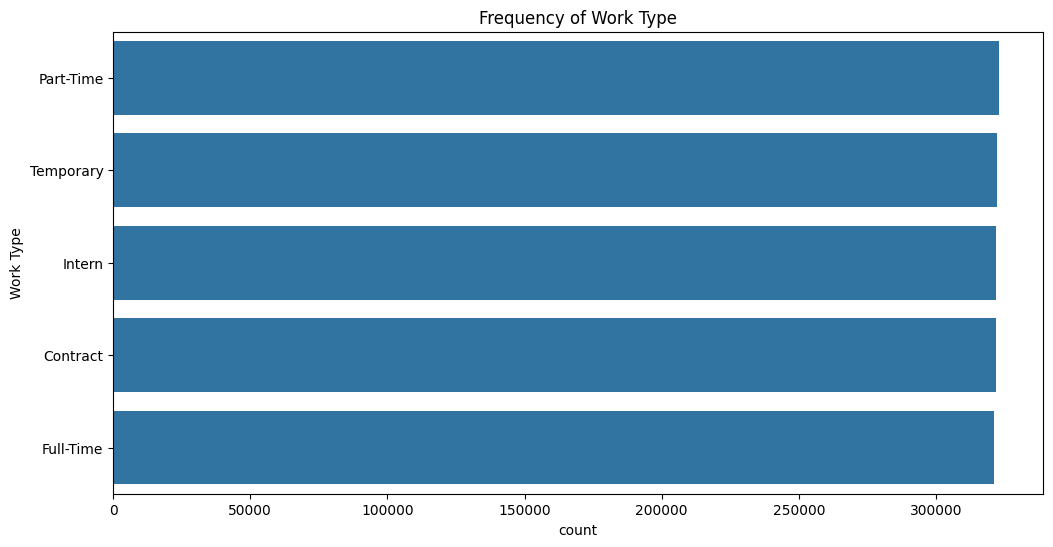

In [6]:
# Frequency distribution of Work Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Work Type', data=df, order=df['Work Type'].value_counts().index)
plt.title('Frequency of Work Type')
plt.show()

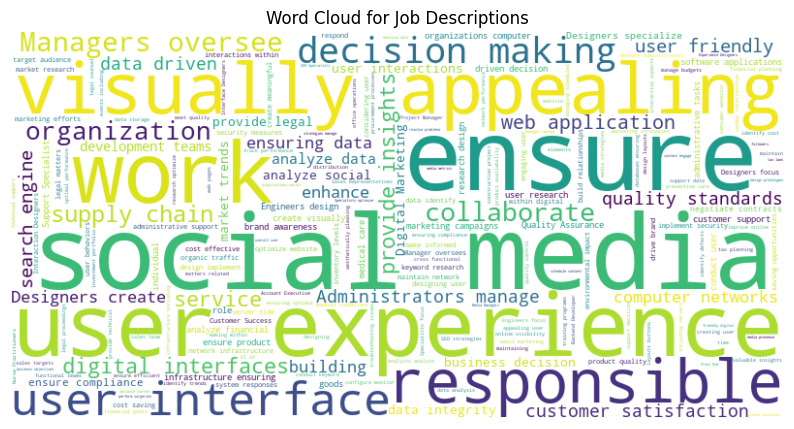

In [7]:
# Word cloud for Job Description
job_descriptions = ' '.join(df['Job Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_descriptions)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()

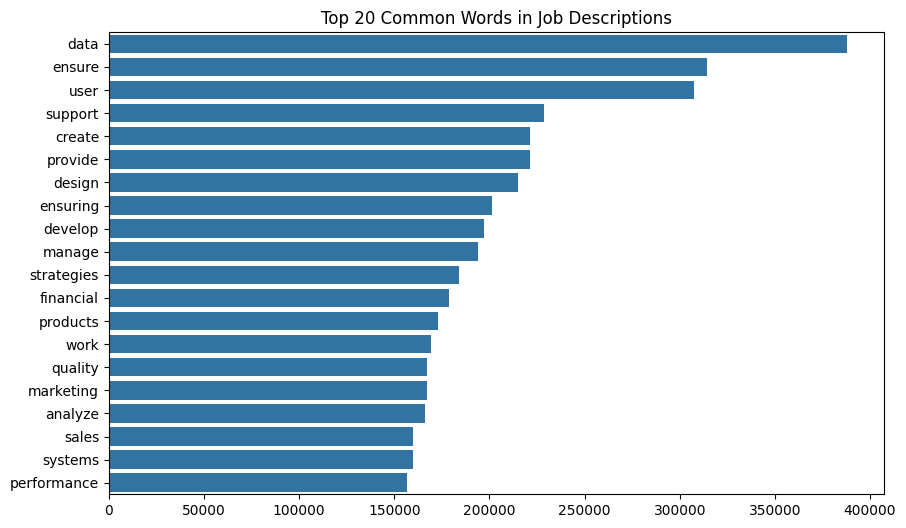

In [10]:
# Common words in Job Description
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Job Description'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
words, freqs = zip(*word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words)
plt.title('Top 20 Common Words in Job Descriptions')
plt.show()

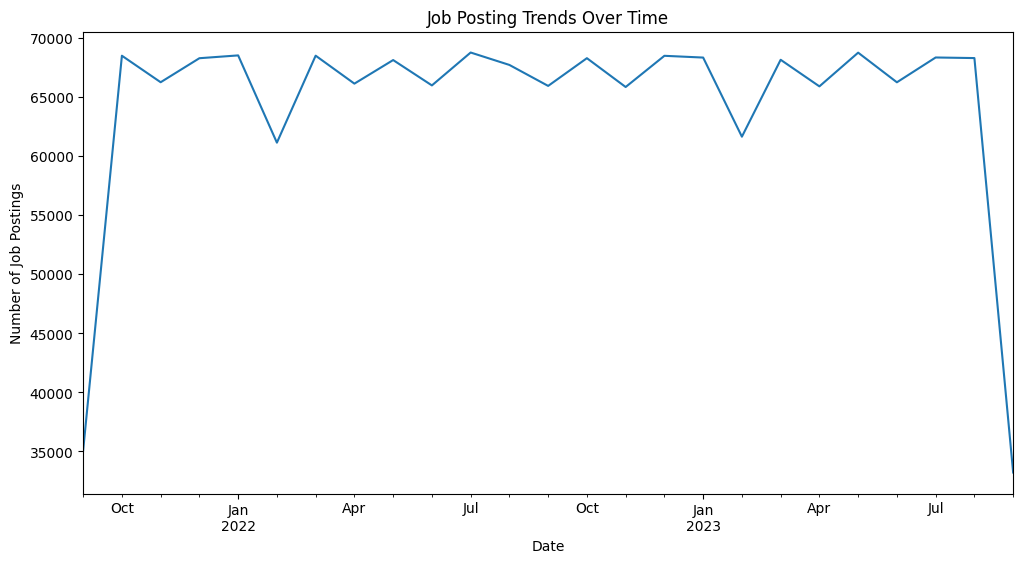

In [12]:
# Trend analysis over time
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])
df['YearMonth'] = df['Job Posting Date'].dt.to_period('M')
job_trends = df.groupby('YearMonth').size()
plt.figure(figsize=(12, 6))
job_trends.plot()
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

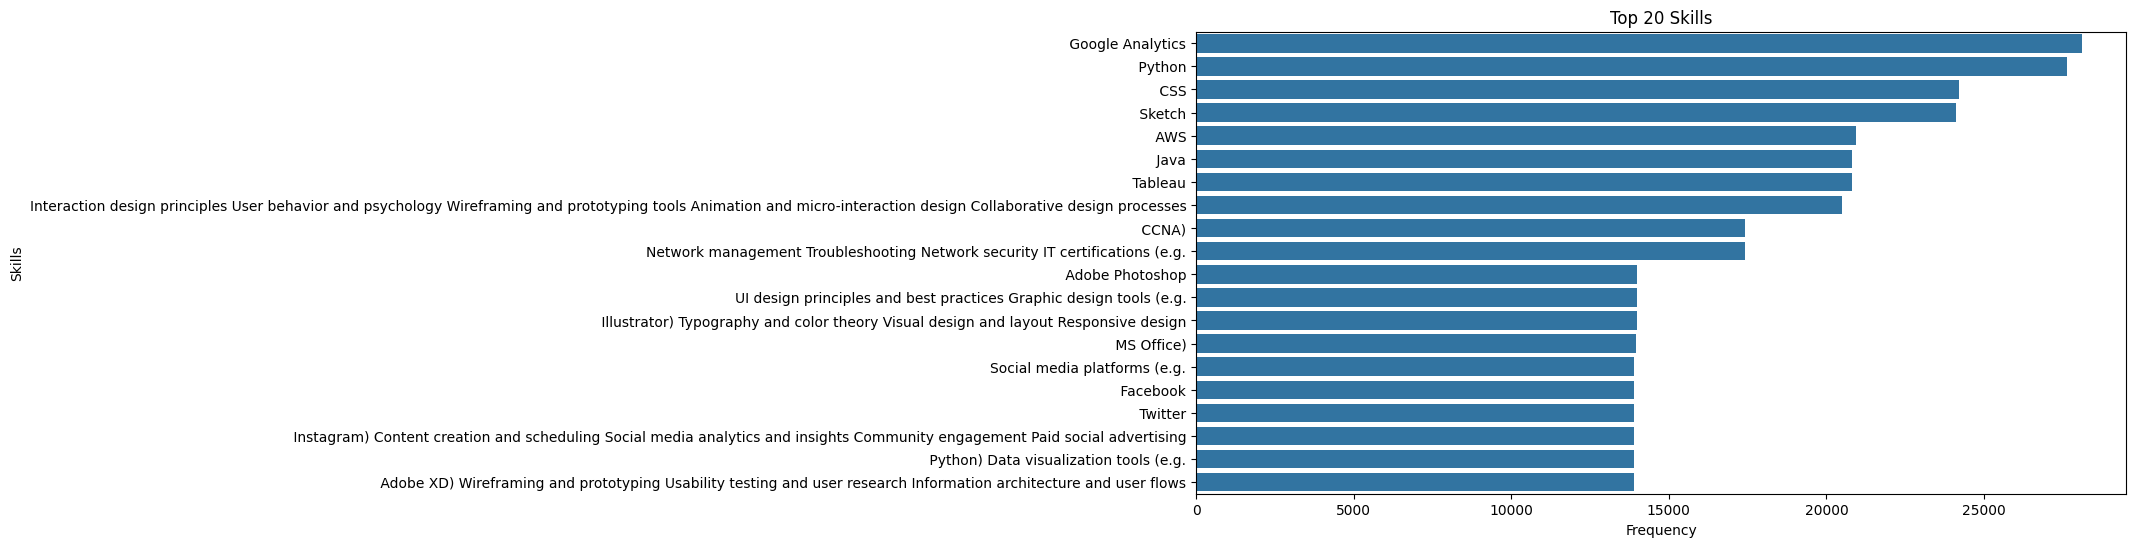

In [14]:
from collections import Counter

skills = df['skills'].str.split(',').explode()
top_skills = skills.value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top 20 Skills')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()

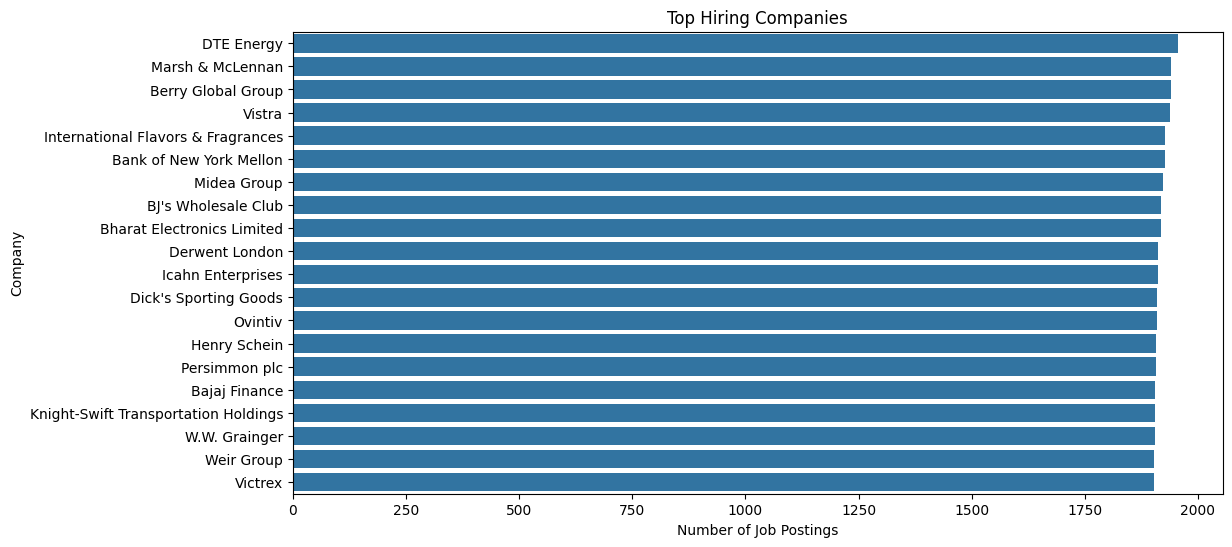

In [16]:
top_companies = df['Company'].value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top Hiring Companies')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.show()

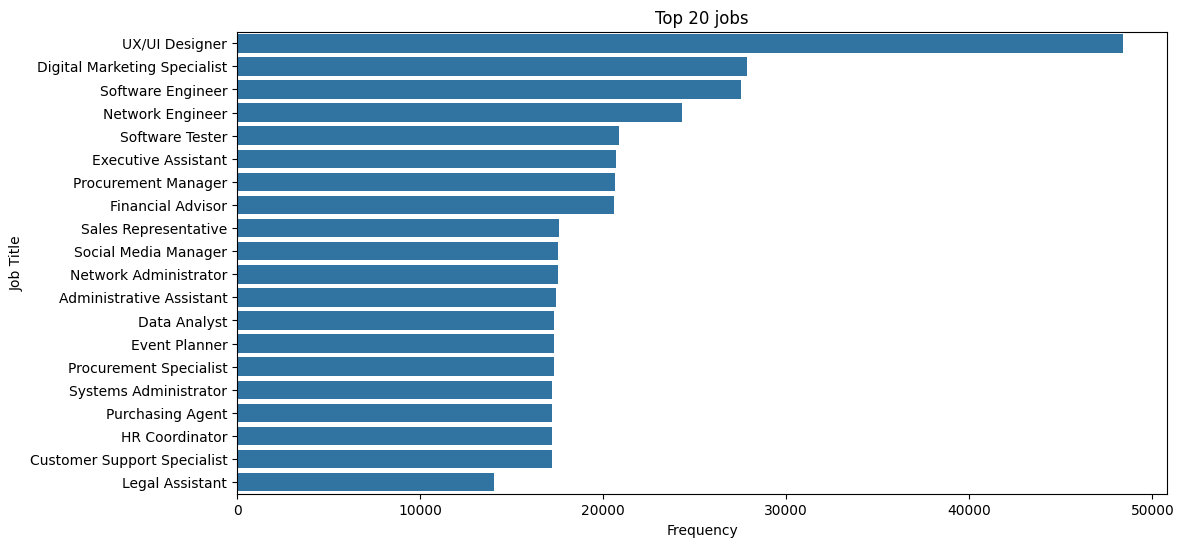

In [21]:
skills = df['Job Title'].str.split(',').explode()
top_skills = skills.value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top 20 jobs')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

In [34]:
# Function to split and clean skills
def split_and_clean(skills):
    if pd.isna(skills):
        return []
    return [skill.strip() for skill in skills.split(',')]

# Apply the split_and_clean function to the 'skills' column
df['skills_clean'] = df['skills'].apply(split_and_clean)

top_job_titles = df['Job Title'].value_counts().nlargest(10).index

In [35]:
# Filter data for top job titles
filtered_data = df[df['Job Title'].isin(top_job_titles)]

# Explode skills to individual rows
skills_exploded = filtered_data.explode('skills_clean')

# Count skills for each job title
skills_count = skills_exploded.groupby(['Job Title', 'skills_clean']).size().reset_index(name='Count')

# Pivot table for visualization
skills_pivot = skills_count.pivot(index='Job Title', columns='skills_clean', values='Count').fillna(0)

